# Data Analysis and Visualization of MetHighlights Metadata

This Notebook takes the `MetHighlightsData.json` metadata extracted from their Open Collection API, and selects, sorts and visualizes several categories relevant for a broad analysis of what does the museum considers its most important artworks in the collection. 

In [249]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
%matplotlib inline

Load the JSON file into a python object:

In [289]:
with open('MetHighlightsDataC.json') as f:
    data = json.load(f)

In [290]:
# Create an empty dictionary
r_dict = dict()

In [291]:
#Empty lists for each of the necessary collumns
objectID = []
accessionYear = []
department = []
objectName = []
title = []
artistRole = []
artistDisplayName = []
artistDisplayBio = []
artistNationality = []
objectDate = []
medium = []
dimensions = []
creditLine = []
city = []
country = []
metadataDate = []
objectURL = []
tags = []

In [292]:
for x in data:
    objectID.append(data[x]['objectID'])
    accessionYear.append(data[x]['accessionYear'])
    department.append(data[x]['department'])
    objectName.append(data[x]['objectName'])
    title.append(data[x]['title'])
    artistRole.append(data[x]['artistRole'])
    artistDisplayName.append(data[x]['artistDisplayName'])
    artistDisplayBio.append(data[x]['artistDisplayBio'])
    artistNationality.append(data[x]['artistNationality'])
    objectDate.append(data[x]['objectDate'])
    medium.append(data[x]['medium'])
    dimensions.append(data[x]['dimensions'])
    creditLine.append(data[x]['creditLine'])
    city.append(data[x]['city'])
    country.append(data[x]['country'])
    metadataDate.append(data[x]['metadataDate'])
    objectURL.append(data[x]['objectURL'])
    tags.append(data[x]['tags'])

In [293]:
tags

[[{'term': 'Boys', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300247598'},
  {'term': 'Fish', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300266085'},
  {'term': 'Boats', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300178749'}],
 [{'term': 'Bears', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300266516'}],
 None,
 [{'term': 'Forests', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300387598'},
  {'term': 'Landscapes',
   'AAT_URL': 'http://vocab.getty.edu/page/aat/300132294'}],
 [{'term': 'Men', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300025928'},
  {'term': 'Male Nudes',
   'AAT_URL': 'http://vocab.getty.edu/page/aat/300189568'}],
 [{'term': 'Interiors',
   'AAT_URL': 'http://vocab.getty.edu/page/aat/300391239'},
  {'term': 'Jewelry', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300209286'},
  {'term': 'Couples', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300379217'},
  {'term': 'Men', 'AAT_URL': 'http://vocab.getty.edu/page/aat/300025928'},
  {'term': 'Women', 'AAT_URL': 'http://voc

Method for obtaining the keywords from within the nested dictionary

In [294]:
result = []
for inner_list in tags:
    if inner_list is None:
        result.append(u'')
    else:
        # None and [] are falsy, ignore them

        # got something, add a new empty list to add things into
        result.append(u'')
        for d in inner_list:
            # add all dicts term to the last item of result
            result[-1]+=(d["term"]) + ', ' 

#print(result)

Appending the values from each dictionary key from each value into the previously declared lists

In [296]:
#Asigning each list to a homonymous key
r_dict = {'objectID' : objectID, 'title' : title, 'artistDisplayName' : artistDisplayName, 'objectName' : objectName,
          'objectDate' : objectDate, 'medium' : medium, 'dimensions' : dimensions, 'department': department,
          'artistNationality' : artistNationality, 'accessionYear' : accessionYear, 'artistRole' : artistRole, 
          'artistDisplayBio' : artistDisplayBio,          
          'creditLine' : creditLine, 'city' : city, 'country' : country, 'metadataDate' : metadataDate,'tags' : result,
          'objectURL' : objectURL}



# Dataframe Cleaning

In [297]:
df = pd.DataFrame(r_dict)
df

objectID                                              title  \
0       12388                                  A Basket of Clams   
1      459184                                     A Bear Walking   
2      591850  A Descriptive Atlas of the Cesnola Collection ...   
3      337105                         A Gathering at Wood's Edge   
4      334002                        Giant Seated in a Landscape   
5      459052                            A Goldsmith in his Shop   
6       10946       A Gorge in the Mountains (Kauterskill Clove)   
7      437283                                    A Hunting Scene   
8      446560  "A King Offers to Make Amends to a Bereaved Mo...   
9      470599                     A Knight of the d'Aluye Family   
10     446563  "A Muslim Pilgrim Learns a Lesson in Piety fro...   
11      14931                                             A Rose   
12     453336                                         A Stallion   
13     547232                           A Tusk Figurine of a Man   
14     436121  A Woman Seated beside a Vase of Flowers (Madam...   
15     679629  A. Persii Satyrarum liber I.D. Iunii Iuuenalis...   
16     591832  Academie de l'espee; ou se domonstrent par rei...   
17     503502                                          Accordion   
18     336222                                       Adam and Eve   
19     469959  Adoration of the Magi from Seven Scenes from t...   
20     472155  Adoration of the Magi from Seven Scenes from t...   
21     459208                         Adoration of the Shepherds   
22      81110                                    Afternoon dress   
23     451268  "Akbar With Lion and Calf", Folio from the Sha...   
24     544056                       Akhenaten Sacrificing a Duck   
25      25111      Album of Tournaments and Parades in Nuremberg   
26      12613                                     Allan Melville   
27     437790             Allegory of the Planets and Continents   
28     680318   Almanach de Normandie pour l'année bissext. 1788   
29     679732  Almanach royal, année bissextile M.DCC.LXCII :...   
30     466187       Altar Frontal with Man of Sorrows and Saints   
31      76974                                          Altar Set   
32     501520                                 Alto Recorder in F   
33     339751  Aman-Jean (Portrait of Edmond François Aman-Jean)   
34      11789                                     Andrew Jackson   
35     465991                            Angels Swinging Censers   
36     449457                             Animal-Spouted Pitcher   
37     470304          Annunciation Triptych (Merode Altarpiece)   
38     544070                                      Antelope Head   
39     680832  Anthologie françoise, ou, Chansons choisies, d...   
40     485518                                       Antigraceful   
41     436106  Antoine Laurent Lavoisier (1743–1794) and His ...   
42     459137  Approach to a Mountain Village with Horsemen o...   
43      11050                          Approaching Thunder Storm   
44     459202    Aquamanile in the Form of Aristotle and Phyllis   
45     469949                   Aquamanile in the Form of a Lion   
46     468633         Aquamanile in the Form of a Mounted Knight   
47     459062           Archangel Gabriel; The Virgin Annunciate   
48     546194                        Arched Harp (shoulder harp)   
49     503613                                           Archlute   
50     437394                     Aristotle with a Bust of Homer   
51     544826   Arm Panel From a Ceremonial Chair of Thutmose IV   
52      24686                                              Armet   
53     451447                                             Armlet   
54      22521                              Armor (<i>Gusoku</i>)   
55      24975                              Armor (<i>Gusoku</i>)   
56      22506  Armor (<i>Yoroi</i>) of Ashikaga Takauji (1305...   
57      35775  Armor Garniture, Probably of King Henry VIII o

### Cleaning Dates

Since the museum primes specificity, the dates are too messed up to use for visualization. Thus, I will replace all values for either XXth century or B.C.E values.

Explanation on the Regex used:

re.search provides a re.match value that is boolean. That is why, when evaluated with the conditional *if*, it takes the necessary string. then the value *x = re.search('regex pattern', string)* puts it in a variable to make use as a string when applying *x.group()* method.

*[0-9]* searches for any [0,1,2,3,4,5,6,7,8,9] values. *{int}* especifies how many digits takes into consideration.

     
to replace a string in a list i need the index value for that string. that is why I apply *idxval = cleandatesl.index(txt)*, which gets the index value, so the string can be replaced by using *cleandatesl[idxval] = 'new value'*

In [298]:
df['objectDate'].value_counts().head(60)

19th century                   10
ca. 1353–1336 B.C.              7
ca. 1390–1353 B.C.              6
ca. 1180                        5
ca. 1390–1352 B.C.              5
332–30 B.C.                     5
ca. 1500                        5
1881                            5
second half 16th century        5
ca. 1400                        4
10th century                    4
1790                            4
1891                            4
17th century                    4
late 17th century               4
ca. 1336–1327 B.C.              4
1784                            4
                                4
1597–98                         4
1866                            4
mid-16th century                4
16th century                    4
ca. 1981–1975 B.C.              4
ca. 1600                        4
ca. 1760                        3
14th century                    3
ca. 1250                        3
early 17th century              3
1658                            3
1752          

In [299]:
#Primary Cleaning
cleandatesl = []
for x in df['objectDate']:
    b = re.sub('ca. ', '',x)
    b = re.sub('by ', '',b)     
    b = re.sub('late ' , '',b)
    b = re.sub('early ' , '',b)
    b = re.sub('2nd century A.D.' , '2th century',b)
    b = re.sub('centuries' , 'century',b)
    b = re.sub(r'[^a-zA-Z0-9.]', ' ', b)
    b = re.sub('A.D. 60 70' , '1st century',b)
    cleandatesl.append(b)

In [300]:
#takes all B.C dates and turns them to BCE. I don't think is that important to have variety in antiquity for overall purposes
for txt in cleandatesl:
    if re.search('B.C', txt):
        idxval = cleandatesl.index(txt)
        cleandatesl[idxval] = 'B.C.E'

In [301]:
#cleans any XXth century string and leaves it as it is
for txt in cleandatesl:
    if re.search('[0-9]{2}' + 'th century', txt):
        x = re.search('[0-9]{2}' + 'th century', txt)
        idxval = cleandatesl.index(txt)
        cleandatesl[idxval] = x.group()
        

In [302]:
#cleans any Xth century string and leaves it as it is
for txt in cleandatesl:
    if re.search(' '+ '[0-9]{1}' + 'th century', txt):
        x = re.search(' '+ '[0-9]{1}' + 'th century', txt)
        idxval = cleandatesl.index(txt)
        cleandatesl[idxval] = x.group()[1:]

In [303]:
#Takes any 4 digit date and turns it into XXth century
for txt in cleandatesl:
    if re.search('[0-9]{4}', txt):
        x = re.search('[0-9]{4}', txt)
        #i have to take the number, turn to int, add 1 to make it into the century it is, then turn back to string
        intd = int(x.group()[:2])+1
        idxval = cleandatesl.index(txt)
        cleandatesl[idxval] = str(intd) + 'th century'
       

In [304]:
#takes any 3 digit date and turns it into Xth century
for txt in cleandatesl:
    if re.search('[0-9]{3}', txt):
        x = re.search('[0-9]{3}', txt)
        intd = int(x.group()[0])+1
        idxval = cleandatesl.index(txt)
        cleandatesl[idxval] = str(intd) + 'th century'

In [305]:
df['Clean Date'] = cleandatesl

In [306]:
df['Clean Date'].value_counts()

19th century    204
18th century    138
16th century    119
B.C.E           118
17th century    115
15th century     81
14th century     49
12th century     37
13th century     33
11th century     17
20th century     16
10th century     14
9th century       7
5th century       6
6th century       6
7th century       5
8th century       5
                  4
2th century       3
1st century       1
3th century       1
Name: Clean Date, dtype: int64

In [339]:
df['Clean Date'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

19th century    20.8%
18th century    14.1%
16th century    12.2%
B.C.E           12.1%
17th century    11.7%
15th century     8.3%
14th century     5.0%
12th century     3.8%
13th century     3.4%
11th century     1.7%
20th century     1.6%
10th century     1.4%
9th century      0.7%
5th century      0.6%
6th century      0.6%
7th century      0.5%
8th century      0.5%
                 0.4%
2th century      0.3%
1st century      0.1%
3th century      0.1%
Name: Clean Date, dtype: object

### Nationality Exploration

Artist nationality is the most known value. Putting it together with country can give an accurate representation of country of origin of each artwork

In [307]:
df.artistNationality.replace('',df.country,inplace=True)

In [308]:
#corrigiendo pais por gentilicio para que no haya dos listas
df.artistNationality.replace('France','French',inplace=True)
df.artistNationality.replace('Italy','Italian',inplace=True)
df.artistNationality.replace('United States','American',inplace=True)
df.artistNationality.replace('Japan','Japanese',inplace=True)
df.artistNationality.replace('China','Chinese',inplace=True)
df.artistNationality.replace('Spain','Spanish',inplace=True)
df.artistNationality.replace('India','Indian',inplace=True)
df.artistNationality.replace('Greece','Greek',inplace=True)
df.artistNationality.replace('Mexico','Mexican',inplace=True)
df.artistNationality.replace('Austria','Austrian',inplace=True)
df.artistNationality.replace('Germany','German',inplace=True)
df.artistNationality.replace('Turkey','Turk',inplace=True)
df.artistNationality.replace('Netherlandish','Dutch',inplace=True)
df.artistNationality.replace('Flemish','Dutch',inplace=True)

In [324]:
#Ugly code but solved the problem

for x in df['artistNationality']:
    if (x == ''):
        df.artistNationality.replace('',df.department,inplace=True)
    if (x == 'Egyptian Art'):
        df.artistNationality.replace('Egyptian Art','Egypt',inplace=True)
    elif (x == 'Asian Art'):
        df.artistNationality.replace('Asian Art','Generally Asian',inplace=True)
    elif (x == 'Medieval Art'):
        df.artistNationality.replace('Medieval Art','Generally European',inplace=True)
    elif (x == 'Costume Institute'):
        df.artistNationality.replace('Costume Institute','Undetermined',inplace=True)
    elif (x == 'The Cloisters'):
        df.artistNationality.replace('The Cloisters','Undetermined',inplace=True)
    elif (x == 'Robert Lehman Collection'):
        df.artistNationality.replace('Robert Lehman Collection','Indetermined',inplace=True)
    elif (x == 'The Libraries'):
        df.artistNationality.replace('The Libraries','Undetermined',inplace=True)
    elif (x == 'The American Wing'):
        df.artistNationality.replace('The American Wing','American',inplace=True)
    elif (x == 'Arms and Armor'):
        df.artistNationality.replace('Arms and Armor','Generally European',inplace=True)

In [325]:
df['artistNationality'].value_counts()

French                                     140
Egypt                                      121
American                                   105
Italian                                     98
Undetermined                                60
Dutch                                       57
German                                      55
Generally Asian                             40
Iran                                        34
Generally European                          33
Spanish                                     24
Indian                                      23
Japanese                                    22
Turk                                        20
Chinese                                     16
British                                     14
Indetermined                                13
Austrian                                     8
present-day Afghanistan                      5
Greek                                        5
Mexican                                      5
Iraq         

In [326]:
national = df['artistNationality'].value_counts()
auxx = []
for x in national:
    percent = (x / sum(national)) * 100
    auxx.append(percent)

In [328]:
sum(national)

979

In [329]:
df[df['country']=='']

objectID                                              title  \
0       12388                                  A Basket of Clams   
1      459184                                     A Bear Walking   
2      591850  A Descriptive Atlas of the Cesnola Collection ...   
5      459052                            A Goldsmith in his Shop   
6       10946       A Gorge in the Mountains (Kauterskill Clove)   
7      437283                                    A Hunting Scene   
11      14931                                             A Rose   
14     436121  A Woman Seated beside a Vase of Flowers (Madam...   
16     591832  Academie de l'espee; ou se domonstrent par rei...   
18     336222                                       Adam and Eve   
21     459208                         Adoration of the Shepherds   
22      81110                                    Afternoon dress   
24     544056                       Akhenaten Sacrificing a Duck   
26      12613                                     Allan Melville   
27     437790             Allegory of the Planets and Continents   
31      76974                                          Altar Set   
33     339751  Aman-Jean (Portrait of Edmond François Aman-Jean)   
34      11789                                     Andrew Jackson   
35     465991                            Angels Swinging Censers   
38     544070                                      Antelope Head   
40     485518                                       Antigraceful   
41     436106  Antoine Laurent Lavoisier (1743–1794) and His ...   
42     459137  Approach to a Mountain Village with Horsemen o...   
43      11050                          Approaching Thunder Storm   
44     459202    Aquamanile in the Form of Aristotle and Phyllis   
45     469949                   Aquamanile in the Form of a Lion   
47     459062           Archangel Gabriel; The Virgin Annunciate   
50     437394                     Aristotle with a Bust of Homer   
62     459198  Armorial Plate (tondino): The story of King Midas   
63     459245  Armorial dish: Supper at the House of Simon th...   
64     459199                                     Armorial tazza   
65      13211  Arrangement in Flesh Colour and Black: Portrai...   
68     705638  Artistic houses : being a series of interior v...   
71     459241  At the Circus: The Spanish Walk (Au Cirque: Le...   
72      10464                                     At the Seaside   
73      11227                                        Autumn Oaks   
74     337057                          Bacchanal with a Wine Vat   
75     335240                                          Bacchanal   
76     459236                                Bacchus and Ariadne   
78     501109                                               Bala   
80     440723                                       Bashi-Bazouk   
84     470308                                   Beaker with Apes   
88      39918             Biographies of Lian Po and Lin Xiangru   
92     437326           Blind Orion Searching for the Rising Sun   
93     547694  Block Statue of a Prophet of Montu and Scribe ...   
97     436947                                            Boating   
99     466105                 Booklet with Scenes of the Passion   
100    438012                          Bouquet of Chrysanthemums   
101    468181                                         Bow Brooch   
104     39649                      Bowl with Dragons among Waves   
109    459197  Bowl with the Arms of Pope Julius II and the M...   
110     17053                                     Boys in a Dory   
114    436579                                        Broken Eggs   
115     74832                       Buddha Expounding the Dharma   
116     42162                  Buddha Maitreya (Mile) Altarpiece   
117     42716      Buddha of Medicine Bhaishajyaguru (Yaoshi fo)   
118     42163               Buddha, Probably Amitabha (Amituofo)   
119    459083              Burgomaster Jan van Duren (1613–16

*What percentage of unkonwn artists are western or not?*

In [330]:
dfart = pd.DataFrame()
Europe = ['French','Italian', 'Dutch', 'German', 'Generally European','Spanish', 'Germany','British','Austrian','Greek',
          'England','Franco-Netherlandish','present-day France','South Netherlands','Russian','Lower Austria','probably Swiss',
         'Irish','Swiss','Roman','Portuguese','North Netherlandish','Belgium','Southern Netherlands (woven)','France (cartoon)',
         'Germany (?)','Austrian, active Italy','Greek and Roman Art','English','Hanoverian (German)','Emilian','French, Limoges',
         'Russian','Norway','German (active Italy)','Southern Russia or Black Sea Region (?)','Belgian','Switzerland','Flemish, active The Netherlands',
         'Swiss','France (cartoon)']
Asia = ['Generally Asian','Iran','Indian','Japanese','Turk','Chinese','present-day Afghanistan','Syria','Iraq','Tibet','Yemen',
       'present-day Pakistan','Eastern Iran or present-day Afghanistan','probably Syria','Turkish','Iraq or Northern Jazira',
       'Iran or Afghanistan','Northern India or Pakistan','possibly Iranian','China or Korea','Northwestern Iran, probably',
       'Iran or Central Asia','Iran or Iraq','Sothern Turkmenistan','Persian','Thailand','Iran (Persia)','Northern India', 'Northern India or Pakistan',
       'Iran or Afghanistan',]
NorthAmerica = ['American','Mexican','American, Scottish','German American','American, born Ireland']
Africa = ['Egypt','probably Egypt','Tunisia','Syria or North Africa','Uganda','Egypt and Sudan']
SouthAmerica = ['Colombia']

In [340]:
au = []
for x in df['artistNationality']:
    if x in Europe:
        au.append('Europe')
    elif x in Asia:
        au.append('Asia')
    elif x in NorthAmerica:
        au.append('NorthAmerica')
    elif x in Africa:
        au.append('Africa')
    else:
        au.append('Indeterminate')
au2 = []
for n in df['artistDisplayName']:
    if n == '':
        au2.append('Unknown')
    else:
        au2.append('Known')
dfartd = {'Region': au, 'Artist_Name': au2}
dfart = pd.DataFrame(dfartd)

In [341]:
s = dfart.Region
counts = s.value_counts()
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per100': percent100})

counts per100
Europe            467  47.7%
Asia              189  19.3%
Africa            128  13.1%
NorthAmerica      114  11.6%
Indeterminate      81   8.3%

In [342]:
dfart.groupby(by=['Region','Artist_Name'])['Artist_Name'].count()#/dfart['Region'].count()

Region         Artist_Name
Africa         Known            2
               Unknown        126
Asia           Known           67
               Unknown        122
Europe         Known          363
               Unknown        104
Indeterminate  Known           21
               Unknown         60
NorthAmerica   Known          106
               Unknown          8
Name: Artist_Name, dtype: int64

In [343]:
dfart.groupby(by=['Region'])['Artist_Name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


Region         Artist_Name
Africa         Unknown        98.4%
               Known           1.6%
Asia           Unknown        64.6%
               Known          35.4%
Europe         Known          77.7%
               Unknown        22.3%
Indeterminate  Unknown        74.1%
               Known          25.9%
NorthAmerica   Known          93.0%
               Unknown         7.0%
Name: Artist_Name, dtype: object

### Credit Line

From which collection does the piece come from? Splitting the credit line gives a view on this, in case you wanna research each collection and collector later

In [309]:
df['creditYear']=df.creditLine.str.extract(r'([\d]+)',expand=False)
df['creditLine']=df.creditLine.str.replace('\d+', '')

In [344]:
df['creditLine'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Rogers Fund,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            10.5%
Robert Lehman Collection,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### Getting frequency for tags

In [345]:
import re
taggo = u""
for x in result:
    taggo+=x
    
clean = re.sub("[^a-zA-Z]"," ", taggo)

In [346]:
wordlist = clean.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [347]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux
stopwords = ['the','and','of','from','in']
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [348]:
wordlist = removeStopwords(wordlist, stopwords)
dictionary = wordListToFreqDict(wordlist)
sorteddict = sortFreqDict(dictionary)

for s in sorteddict: print(str(s))

(268, 'Men')
(144, 'Women')
(73, 'Portraits')
(54, 'Virgin')
(54, 'Mary')
(48, 'Landscapes')
(47, 'Christ')
(44, 'Flowers')
(40, 'Birds')
(38, 'Saint')
(33, 'Dogs')
(32, 'Horses')
(32, 'Angels')
(28, 'Lions')
(26, 'Boats')
(24, 'Saints')
(24, 'Riding')
(24, 'Horse')
(24, 'Hieroglyphs')
(24, 'Animals')
(23, 'Dragons')
(22, 'Nudes')
(20, 'Heads')
(19, 'Crucifixion')
(18, 'Madonna')
(18, 'Arabic')
(17, 'John')
(17, 'Child')
(16, 'Musical')
(16, 'Instruments')
(16, 'Coat')
(16, 'Arms')
(15, 'Trees')
(15, 'Jesus')
(14, 'Female')
(14, 'Boys')
(14, 'Annunciation')
(14, 'Adoration')
(13, 'Eagles')
(13, 'Children')
(12, 'Dresses')
(12, 'Cross')
(11, 'Musicians')
(11, 'Mountains')
(11, 'Deer')
(10, 'an')
(10, 'Qur')
(10, 'Kings')
(10, 'Interiors')
(9, 'Soldiers')
(9, 'Profiles')
(9, 'Magi')
(9, 'Hunting')
(9, 'Human')
(9, 'Girls')
(9, 'Figures')
(9, 'Cats')
(9, 'Buddhism')
(9, 'Battles')
(9, 'Baptist')
(8, 'Waves')
(8, 'Shepherds')
(8, 'Objects')
(8, 'Male')
(8, 'Family')
(8, 'Evangelist')
(7, '

In [360]:
dfwords['Words'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Men                10.8%
Women               5.8%
Portraits           2.9%
Mary                2.2%
Virgin              2.2%
Landscapes          1.9%
Christ              1.9%
Flowers             1.8%
Birds               1.6%
Saint               1.5%
Dogs                1.3%
Angels              1.3%
Horses              1.3%
Lions               1.1%
Boats               1.0%
Riding              1.0%
Horse               1.0%
Hieroglyphs         1.0%
Animals             1.0%
Saints              1.0%
Dragons             0.9%
Nudes               0.9%
Heads               0.8%
Crucifixion         0.8%
Arabic              0.7%
Madonna             0.7%
John                0.7%
Child               0.7%
Coat                0.6%
Musical             0.6%
Arms                0.6%
Instruments         0.6%
Jesus               0.6%
Trees               0.6%
Annunciation        0.6%
Boys                0.6%
Adoration           0.6%
Female              0.6%
Children            0.5%
Eagles              0.5%


### Obtaining object type column

The medium category is extremely diverse and hard to classify, as well as incomplete. Object type provides a more useful category type that processed along with their department of origin can provide an overview of what type of objects compose the "highlight" selection of the museum

In [361]:
#The ammount of different categories of object types
df['objectName'].value_counts()[0]

193

In [362]:
pd.set_option('display.max_rows', None)
df.groupby(by='objectName').count()

objectID  title  \
objectName                                                            
                                                          65     65   
Accordion                                                  1      1   
Afternoon dress                                            1      1   
Album                                                      1      1   
Album leaf                                                 3      3   
Altar set                                                  1      1   
Altarpiece                                                 2      2   
Altarpiece fragment                                        1      1   
Alto Recorder in F                                         1      1   
Amphora, ibex, blue-painted ware                           1      1   
Amulet, Ram's head                                         1      1   
Amulet, baboon                                             1      1   
Antependium; Altar frontal                                 1      1   
Aquamanile                                                 3      3   
Archlute                                                   1      1   
Armet                                                      1      1   
Armlet                                                     1      1   
Armor                                                      4      4   
Armor (<i>Gusoku</i>)                                      2      2   
Armor (<i>Yoroi</i>)                                       1      1   
Armor garniture                                            1      1   
Asiatic captive, furniture decoration                      1      1   
Astrolabe                                                  1      1   
Bala                                                       1      1   
Bass Viola da Gamba                                        1      1   
Bassoon                                                    2      2   
Bay, stela, stelephorous                                   1      1   
Beaker                                                     2      2   
Beatus; Manuscript leaf                                    2      2   
Blade for a dagger (Tantō)                                 1      1   
Blades and mountings for a pair of swords (Daishō)         1      1   
Block Statue, Governor of Sais                             1      1   
Block statue, Djedkhonsuefankh                             1      1   
Book                                                       1      1   
Book of Hours; Manuscript                                  2      2   
Bottle                                                     1      1   
Bottle, long-necked, wine                                  1      1   
Bowl                                                      10     10   
Bowl and dish                                              1      1   
Box                                                        1      1   
Bracelet, Agathodaimon, Isis-Tyche, Aphrodite, ...         1      1   
Brazier                                                    1      1   
Broad Collar, floral                                       1      1   
Brooch                                                     4      4   
Burgonet                                                   1      1   
Burgonet with falling buffe                                1      1   
Bust                                                       6      6   
Canopic Jar Lid to the jar 07.226.1 of Kiya, se...         1      1   
Cape                                                       1      1   
Card table                                                 1      1   
Carpet                                                    16     16   
Cased set of a flintlock rifle, a pair of pisto...         1      1   
Casket                                                     2      2   
Ceiling                                                    1      1   
Ceiling painting, palace of Amenhotep III                  1      1   
Ceram

In [480]:
df[df['objectName'] == 'Incense burner']

objectID                                              title  \
402    451042  Incense Burner of Amir Saif al-Dunya wa’l-Din ...   

                artistDisplayName      objectName  \
402  Ja`far ibn Muhammad ibn `Ali  Incense burner   

                       objectDate                                   medium  \
402  dated A.H. 577/ A.D. 1181–82  Bronze; cast, engraved, chased, pierced   

                                            dimensions   department  \
402  OveralL. H. 33 1/2 in. (85.1 cm)\r\n          ...  Islamic Art   

    artistNationality accessionYear artistRole artistDisplayBio  \
402              Iran          1951      Maker                    

        creditLine    city country              metadataDate  \
402  Rogers Fund,   Taybad    Iran  2020-03-03T07:20:07.517Z   

                  tags                                          objectURL  \
402  Animals, Arabic,   https://www.metmuseum.org/art/collection/searc...   

       Clean Date creditYear  
402  12th century       1951

*For those rows of unknown object names, merge with medium*

In [363]:
df.objectName.replace('',df.medium,inplace=True)

Very arduous process of checking each object type and categorizing it into bigger categories that can provide a better representation of the content of the collection. Each category is made of a list of the objects attributed to it.

In [488]:
tableware = ['dish','bowl','jar','chalice','aquamanile','ewer','plate','baker','bttle','cup','decanter','goblet','paten'
             ,'pitcher','plate','pyxis','saltcellar','tazza','vase','urn,', 'water pipe','wine ewer','jug']
clothing = ['jacket', 'dress', 'suit','gloves', 'cape','coat','corset','doublet','ensemble','tapestry','fragment','kimono',
           'kosode','robe','gown','shoes','suit','waistcoat', 'walking ensemble','wedding ensemble']
accesories = ['diadem','brooch','comb','reliquary', 'amulet','bracelet','collar','mask','medallion','ring','necklace','pectoral'
             ,'pendant','beads','watch']
objects = ['object','astrolabe','chasse','cippus','coffin','casket','clapper','cross','crown','crucifix','diptych','eagle','frame',
           'piece','bell','lantern','table','mirror','model','mosaic','ostracon','palette','powder','straw','tile', 'container']
buildings = ['cloister','glass','mastaba','mihrab','panel','room','portal','temple','tomb']
furniture = ['tabernacle', 'doorway', 'altar','box', 'brazier','clock','chair','ceiling','crib','cupboard','door','doors',
             'settee','tabernacle','window', 'furniture']
music_instruments = ['violin','harpsichord','accordion','bass','bala','chegah-skah-hdah','cittern','clarinet','claviorganum',
                     'cornet','cornetto', 'damaru','double virginal','double whistle','dizi','dung-chen','horn','ennanga','goqing',
                    'guitar','fiddle','flute','jadghorn','kamānche','drums','koto','mandora','musette','harp','trumpet','o-daiko'
                    ,'flutes','pipa','organ','qin','raven','octave','regal','sea dragon','sgra-snyan','soprano','spinet','piano',
                    'suzu','sō sām sāi','taūs','tánggǔ','viola', 'violoncello', 'archlute','clavichord']
guns_and_armor = ['revolver', 'armor', 'helmet','shield', 'dagger','sword','burgonet','rifle','crossbow','shotgun','pistol', 'pistols',
                'gun','longrifle','scabbard','rapier', 'spur','saber','sallet','shield','whip', 'armet', 'armlet','blade', 'helm ']
work_on_paper = ['paper','drawing','folio','manuscript', 'book','handscroll','handscrolls','scroll','album','single work','card'
                ,'cards','print','screen','tughra','watercolor','print', 'book']
sculpture_figures = ['statue','statue','statuete','statuette','bust','figure','figurine','finial','head','coffin','plaque','pointer','protome',
                    'Relief','Reliquary','Sculpture','Shabti','Shrine','Sphinx','Stela','Talatat','effigy','Torso','boat','Vessel',
                    'board','tablet','yaksha','cosmetic spoon', 'group', 'scarab', 'burner']
tapestry = ['carpet','cloth','coverlet','mandala','quilt','sampler','tapestry','lining','textile','tiraz']
painting = ['screen','painting','roundel','triptych panels']


Ugliest code ever, fix it when you have the chance, yet i have no time for that now

Here i listed all the particular objects listed in the 'objectName', and grouped them into 12 categories. I search for each word in each category, and then return the word found. After, compare both word and the categories in order to have a new list with the clean categories, upon which I can get percentages and visualizations. **(note)** -- I'm sorry for the uglyness and disrespectfulness of this code, as I'm not a professional programmer. I'll try to make it more elegant in further versions.

In [491]:
def grabword(string):
        for t in guns_and_armor:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()

        for t in clothing:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in accesories:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in objects:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()

        for t in buildings:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()

        for t in furniture:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in music_instruments:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in tableware:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in work_on_paper:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()

        for t in sculpture_figures:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in tapestry:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()
            
        for t in painting:
            if re.search(t.lower(), string.lower()):
                x = re.search(t.lower(), string.lower())
                return x.group()

In [499]:
work_type = []
for wrd in df['objectName']:
    if grabword(wrd) in tableware :
        work_type.append('Tableware')
    elif grabword(wrd) in clothing :
        work_type.append('Clothing')
    elif grabword(wrd) in accesories :
        work_type.append('Accesories')
    elif grabword(wrd) in objects :
        work_type.append('Objects')
    elif grabword(wrd) in buildings :
        work_type.append('Buildings')
    elif grabword(wrd) in furniture :
        work_type.append('Furniture')
    elif grabword(wrd) in music_instruments :
        work_type.append('Musical Instruments')
    elif grabword(wrd) in guns_and_armor :
        work_type.append('Guns and Armor')
    elif grabword(wrd) in work_on_paper :
        work_type.append('Work on Paper')
    elif grabword(wrd) in sculpture_figures :
        work_type.append('Sculpture and Figures')
    elif grabword(wrd) in tapestry :
        work_type.append('Tapestry')
    elif grabword(wrd) in painting :
        work_type.append('Painting')
    else: 
        work_type.append('Unidentified')
        

In [501]:
df['Artwork Type'] = work_type

In [502]:
df['Artwork Type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Painting                 20.2%
Work on Paper            18.2%
Unidentified             11.5%
Sculpture and Figures    10.4%
Musical Instruments       7.7%
Guns and Armor            5.6%
Tableware                 5.6%
Clothing                  5.5%
Objects                   4.3%
Buildings                 3.0%
Accesories                2.9%
Furniture                 2.8%
Tapestry                  2.3%
Name: Artwork Type, dtype: object

## Category correlation

In [511]:
#Here i gotta learn how to take each hot vector value and equate it with, for example, missing info, or location.
#Might have to move it up so I can see the data as it comes from the api
dfc = pd.DataFrame()
dfc['Artwork Type']=df['Artwork Type'].astype('category').cat.codes
dfc['artistNationality']=df['artistNationality'].astype('category').cat.codes
dfc['artistDisplayName']=df['artistDisplayName'].astype('category').cat.codes
dfc['department']=df['department'].astype('category').cat.codes
dfc['creditLine']=df['creditLine'].astype('category').cat.codes
dfc['Clean Date']=df['Clean Date'].astype('category').cat.codes
dfc['title']=df['title']
dfc.corr()

Artwork Type  artistNationality  artistDisplayName  \
Artwork Type           1.000000          -0.091901           0.231790   
artistNationality     -0.091901           1.000000          -0.207746   
artistDisplayName      0.231790          -0.207746           1.000000   
department             0.175891          -0.046047           0.149056   
creditLine            -0.075620           0.120521          -0.123649   
Clean Date            -0.075418          -0.302562          -0.178839   

                   department  creditLine  Clean Date  
Artwork Type         0.175891   -0.075620   -0.075418  
artistNationality   -0.046047    0.120521   -0.302562  
artistDisplayName    0.149056   -0.123649   -0.178839  
department           1.000000    0.036144   -0.244466  
creditLine           0.036144    1.000000    0.040137  
Clean Date          -0.244466    0.040137    1.000000

In [507]:
#dfc.set_index('title',inplace=True)
dfc.describe()

Artwork Type  objectName  artistNationality  artistDisplayName  \
count    979.000000  979.000000         979.000000         979.000000   
mean       7.529111  186.992850          29.830439         116.101124   
std        3.436232  111.499663          21.781680         136.509695   
min        0.000000    0.000000           0.000000           0.000000   
25%        5.000000  110.000000          15.000000           0.000000   
50%        7.000000  222.000000          25.000000          46.000000   
75%       11.000000  254.000000          44.000000         227.000000   
max       12.000000  410.000000          85.000000         416.000000   

       department  creditLine  Clean Date  
count  979.000000  979.000000  979.000000  
mean     7.932584  224.584270    9.363636  
std      4.692764  123.686067    4.830728  
min      0.000000    0.000000    0.000000  
25%      4.000000  117.000000    7.000000  
50%      8.000000  242.000000    9.000000  
75%     12.000000  353.000000   10.000000  
max     15.000000  381.000000   20.000000

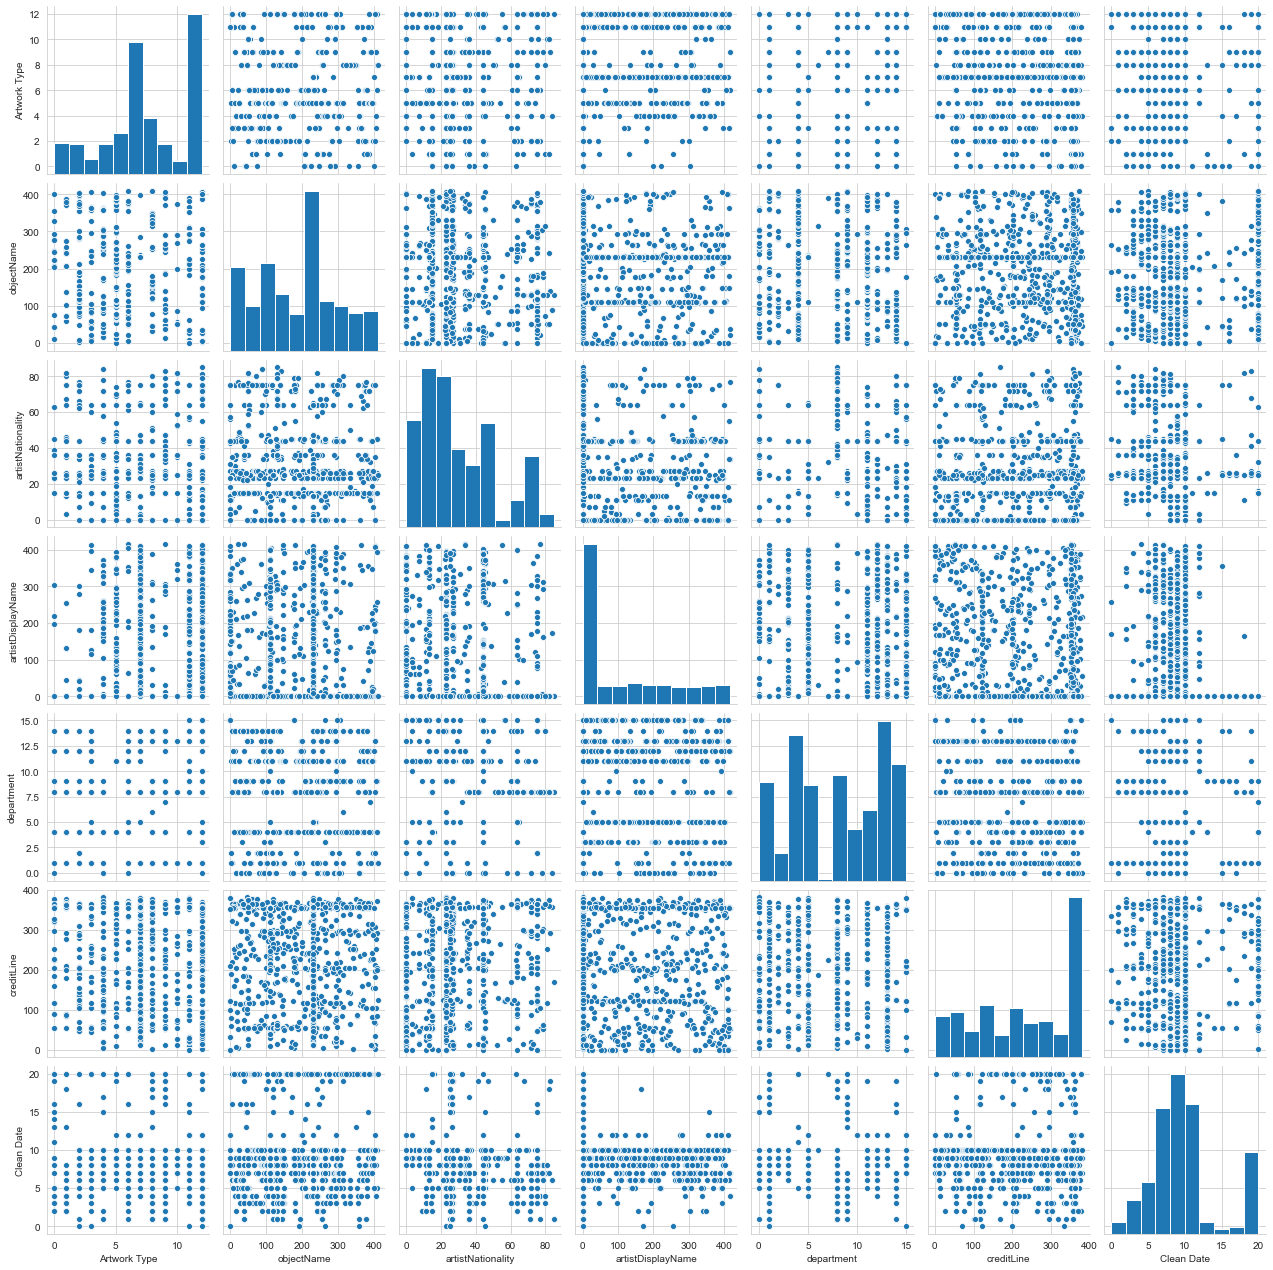

In [508]:
sns.pairplot(dfc)

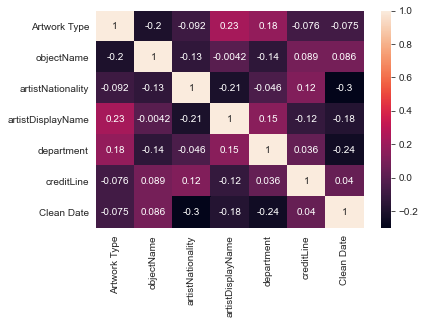

In [509]:
sns.heatmap(dfc.corr(),annot=True)

By running a correlation plot (in which each word is assigned with a single numeric value) we see there are no strong correlations between categories. This is due to the diversity of unique values translated to numeric values. Further (and very time consuming) cleaning should be done for stronger correlations to appear. Yet, we see a slight correlation between:
- `artwork type` and `artist name`, as most artists should work with the same medium
- `department` and `artwork type` as a department such as European paintings will mostly have paintings
- `department` and `credit line` as perhaps most private collectors would be interested in a simmilar type of art, such as egyptian or european painting.
- Inverse correlation between `date` and `nationality`, from which we would have to check which numbers were assigned to dates and to artists to make sense of this inversion. Yet I can suggest it migh just point out to a positive correlation between artists from a region and period clustering, such as Italian renaissance painters or American XIXth century artists.

## Plotting

Bar plot for the ammount of objects each department contributes to highlights

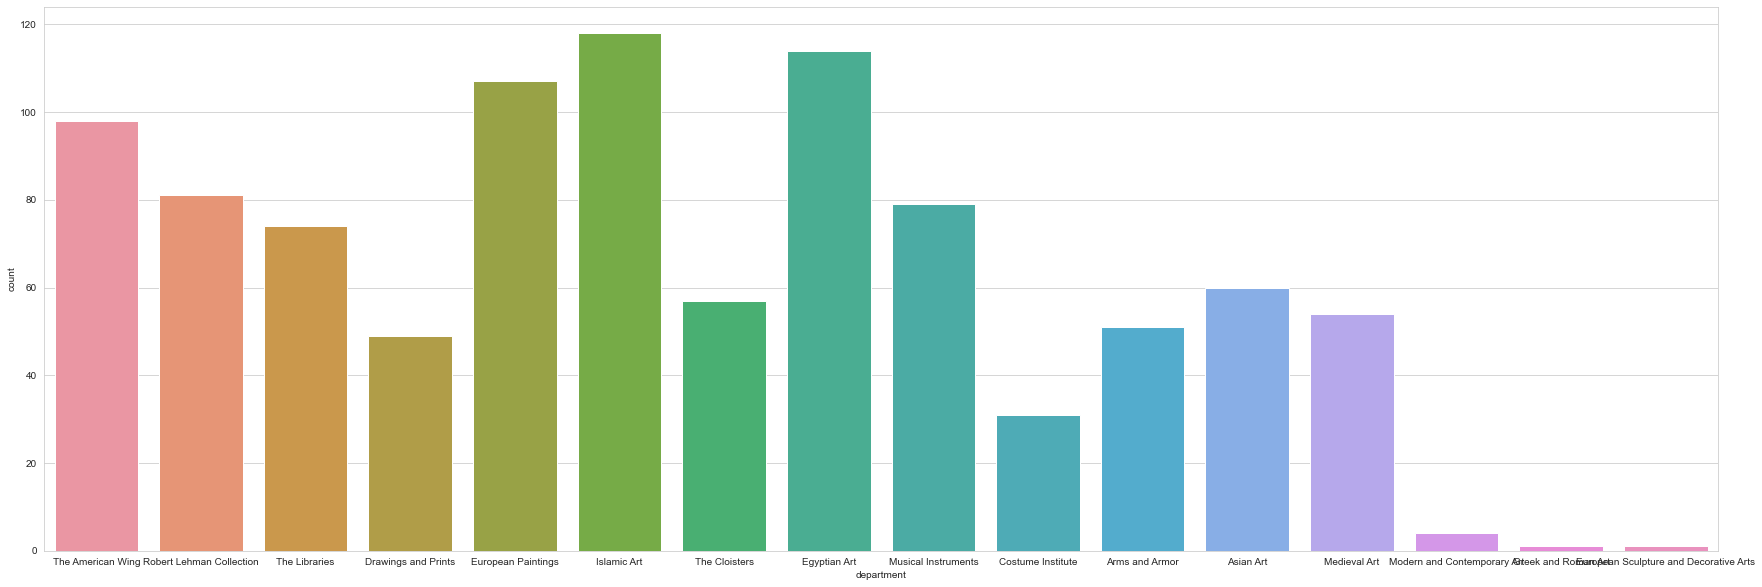

In [519]:
plt.figure(figsize=(30,10))
sns.countplot(x='department',data=df)

### Donut plot 

Nationality

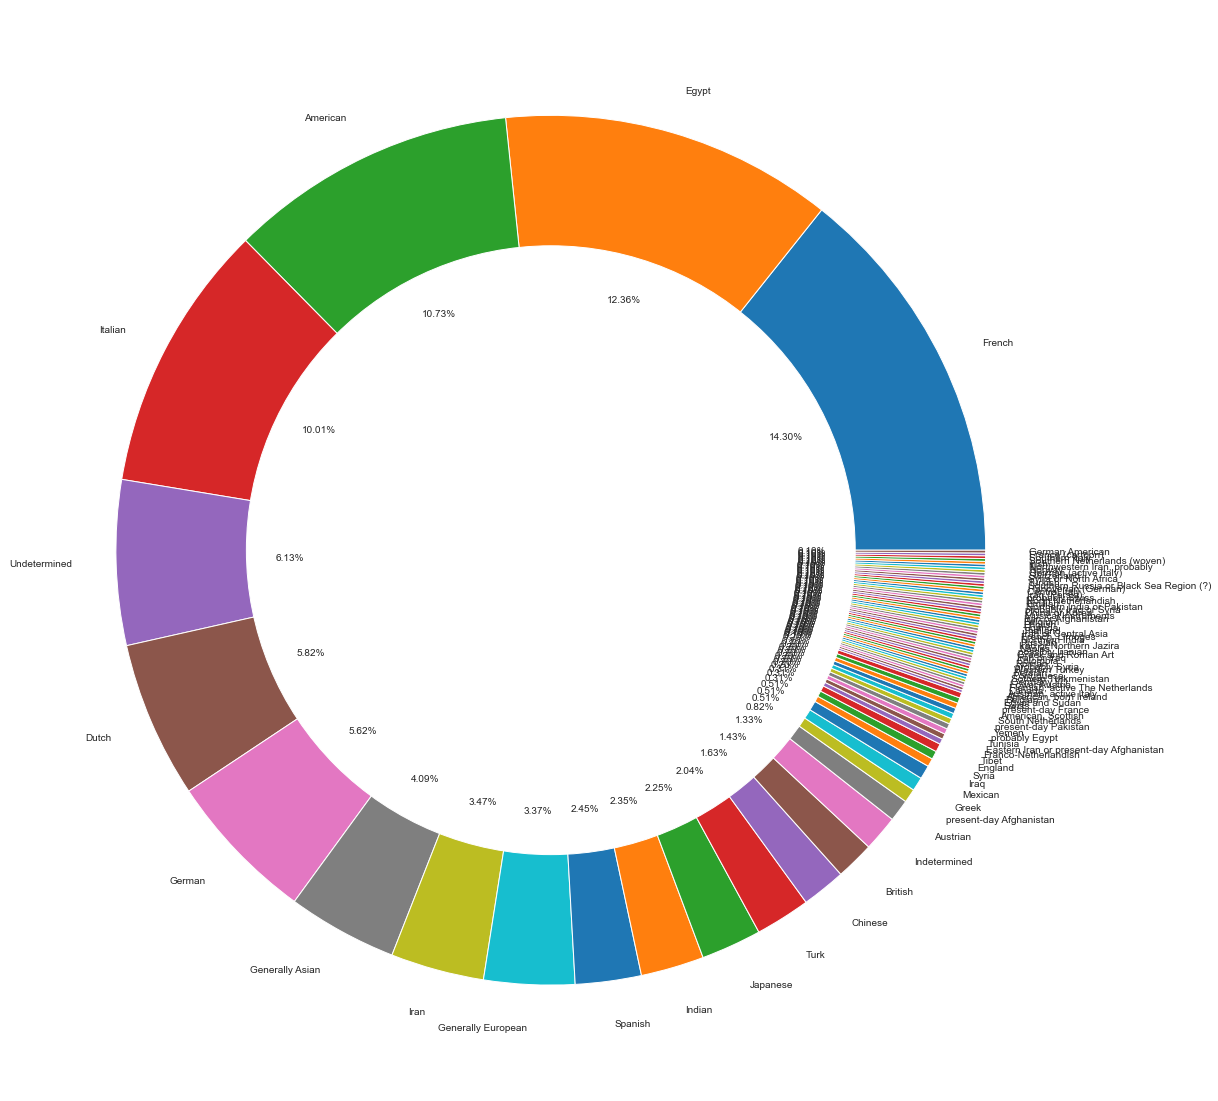

In [512]:
# Create a pieplot
plt.figure(figsize=(50,20))
plt.pie(df['artistNationality'].value_counts(), labels = df['artistNationality'].value_counts().index.tolist(), autopct='%.2f%%')
#plt.show()

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


*By continent*

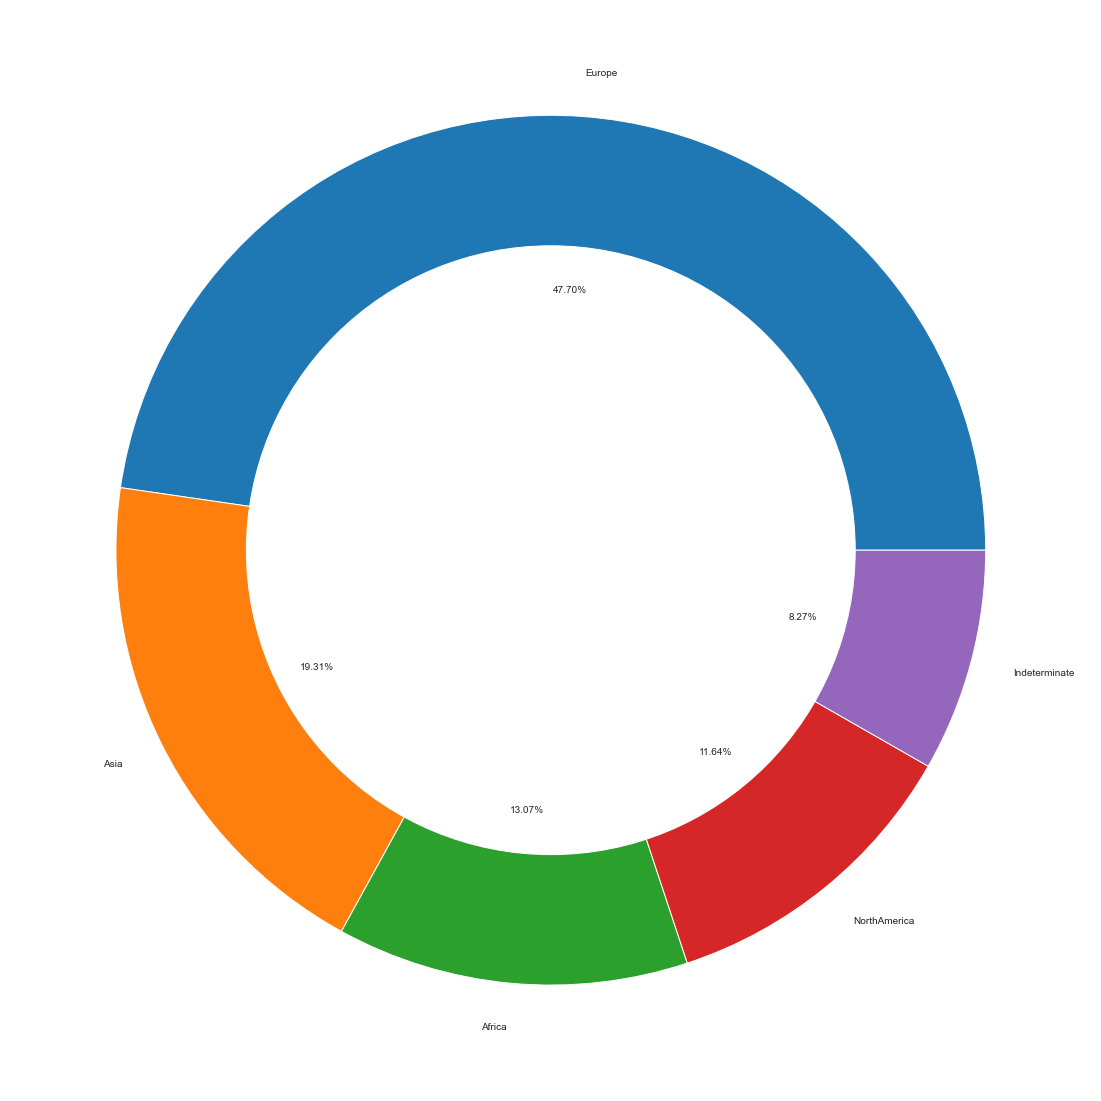

In [517]:
# Create a pieplot
plt.figure(figsize=(50,20))
plt.pie(dfart['Region'].value_counts(), labels = dfart['Region'].value_counts().index.tolist(), autopct='%.2f%%')
#plt.show()

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


x = [30, 20, 15, 25, 10]
dataName = ['data1', 'data2', 'data3', 'data4', 'data5']

plt.figure(figsize=(5,5)) #figsize: output figure window size
plt.pie(x, labels=dataName)

plt.show()

*By object type*

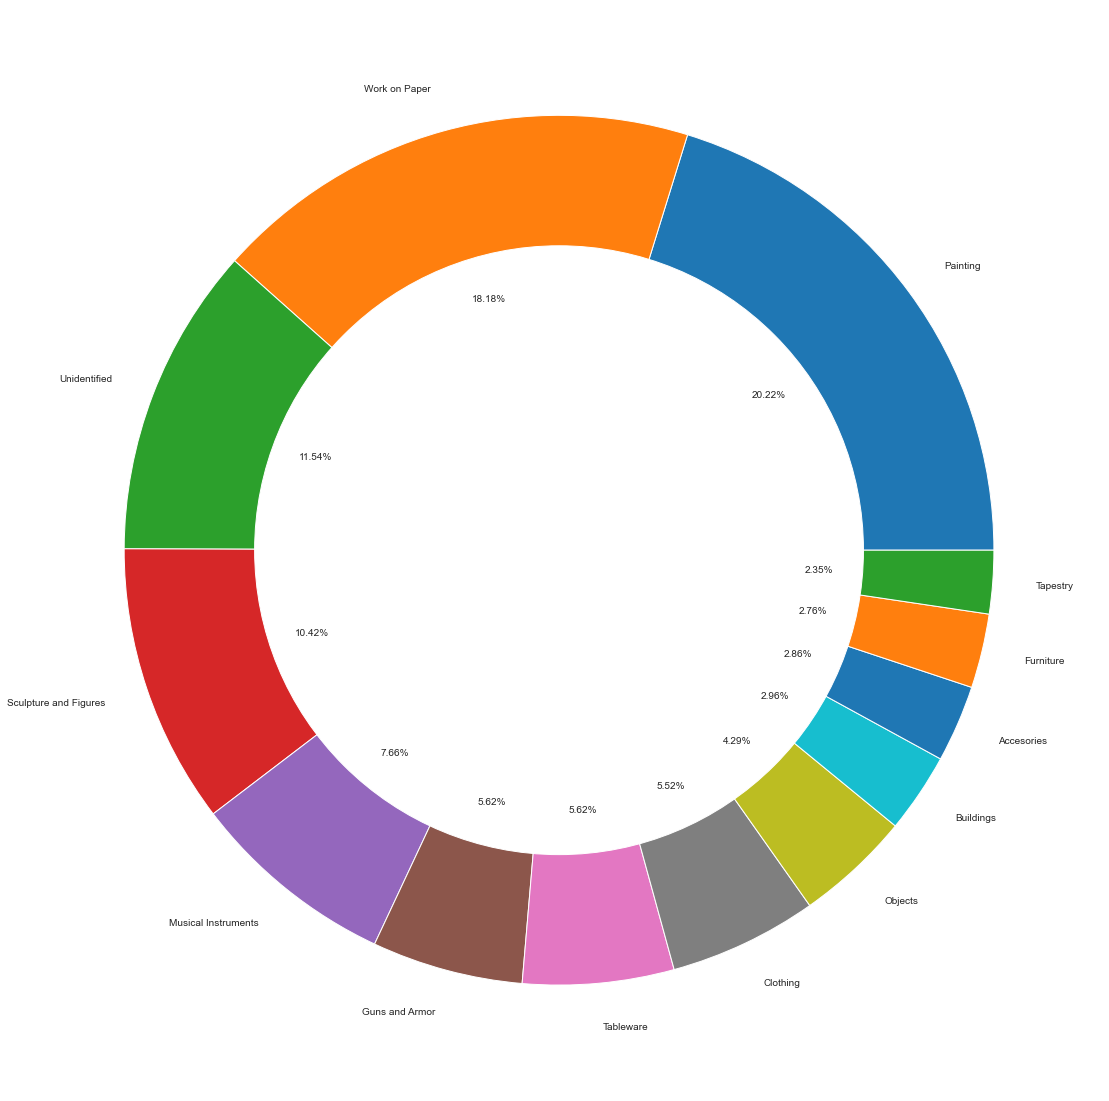

In [513]:
# Create a pieplot
plt.figure(figsize=(50,20))
plt.pie(df['Artwork Type'].value_counts(), labels = df['Artwork Type'].value_counts().index.tolist(),autopct='%.2f%%')
#plt.show()

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


*By creation Century*

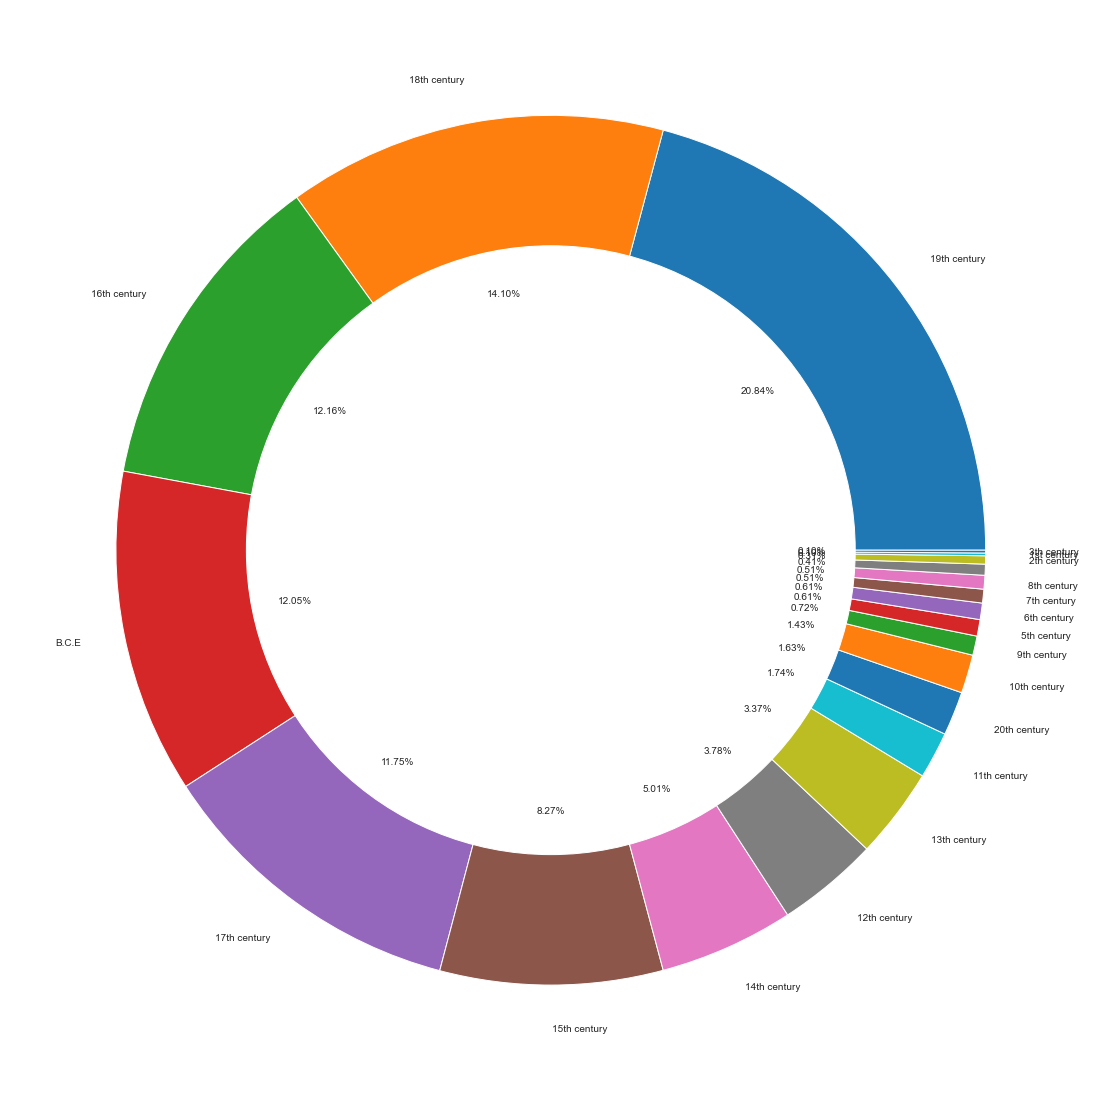

In [514]:
# Create a pieplot
plt.figure(figsize=(50,20))
plt.pie(df['Clean Date'].value_counts(), labels = df['Clean Date'].value_counts().index.tolist(),autopct='%.2f%%')
#plt.show()

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

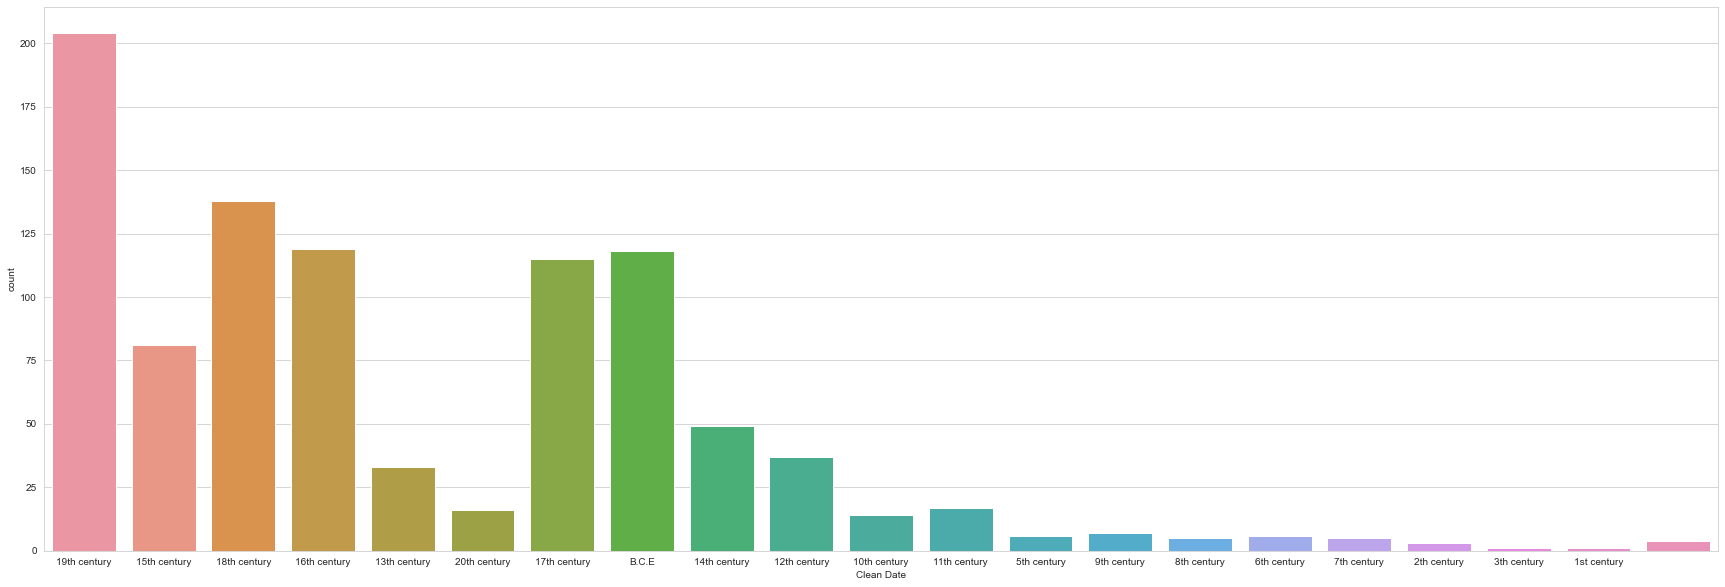

In [199]:
plt.figure(figsize=(30,10))
sns.countplot(x='Clean Date',data=df)